In [113]:
import pandas as pd
import numpy as np


In [114]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [115]:
df= pd.read_csv('iris.csv')

In [116]:
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [117]:
df.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
24,25,4.8,3.4,1.9,0.2,Iris-setosa
14,15,5.8,4.0,1.2,0.2,Iris-setosa
118,119,7.7,2.6,6.9,2.3,Iris-virginica
131,132,7.9,3.8,6.4,2.0,Iris-virginica
57,58,4.9,2.4,3.3,1.0,Iris-versicolor


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [119]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [120]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [121]:
df.drop('Id', axis=1, inplace=True)

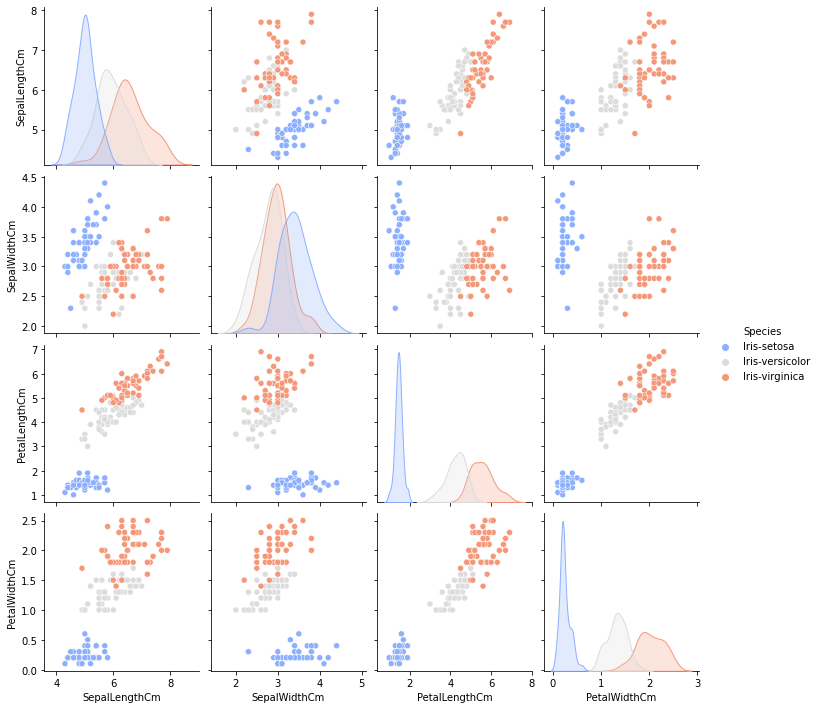

In [122]:
sns.pairplot(df, hue='Species', palette='coolwarm')

In [123]:
from sklearn.preprocessing import StandardScaler

In [124]:
stdscaler = StandardScaler()

In [125]:
stdscaler.fit(df.drop('Species', axis=1))

StandardScaler()

In [126]:
data = stdscaler.transform(df.drop('Species', axis=1))

In [127]:
df1 = pd.DataFrame(data = data, columns=df.columns[:-1])

In [128]:
df1.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [129]:
from sklearn.model_selection import train_test_split

In [175]:
X=df1
y=df['Species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,shuffle = True, random_state=0)

In [176]:
from sklearn.neighbors import KNeighborsClassifier 

In [177]:
knn = KNeighborsClassifier(n_neighbors=1)

In [178]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [179]:
predict = knn.predict(X_test)

In [180]:
from sklearn.metrics import classification_report, confusion_matrix

In [181]:
print(confusion_matrix(y_test, predict))

[[16  0  0]
 [ 0 17  1]
 [ 0  1 10]]


In [182]:
print(classification_report(y_test, predict))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.94      0.94      0.94        18
 Iris-virginica       0.91      0.91      0.91        11

       accuracy                           0.96        45
      macro avg       0.95      0.95      0.95        45
   weighted avg       0.96      0.96      0.96        45



In [183]:
error_rate = []

for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    predict = knn.predict(X_test)
    error_rate.append(np.mean(y_test != predict))

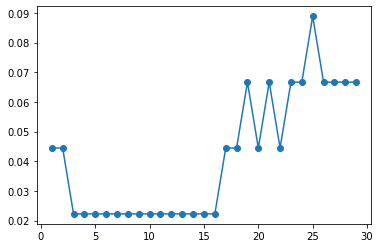

In [184]:
plt.plot(range(1,30), error_rate, 'o-')

In [185]:
knn = KNeighborsClassifier(n_neighbors=16)

In [186]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=16)

In [187]:
predict = knn.predict(X_test)

In [188]:
print(confusion_matrix(y_test, predict))

[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


In [189]:
print(classification_report(y_test, predict))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45

